<a href="https://colab.research.google.com/github/be-ayush/ai-ml-learning/blob/main/KaggleComps/KaggleTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
%mkdir /content/drive/MyDrive/Datasets

In [2]:
%cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [3]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.38MB/s]


In [ ]:
!unzip -q titanic.zip -d .
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [4]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## Set up X_train to be all columns - Survived & y_train is just Survived

X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


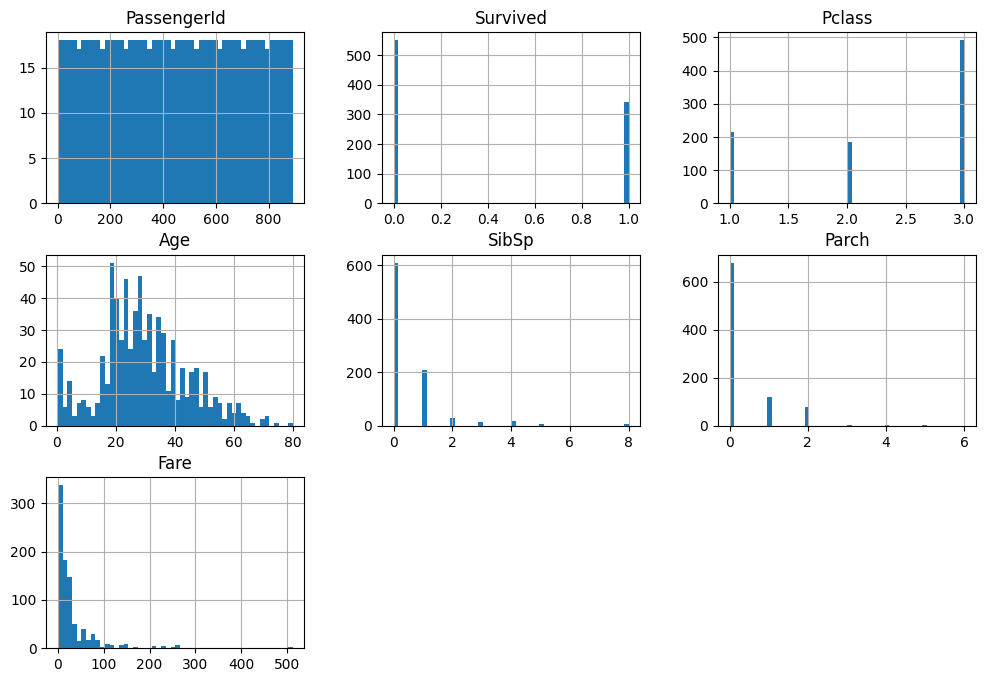

In [8]:
import matplotlib.pyplot as plt

train_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix['Survived']

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


In [12]:
X_train.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,96,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [13]:
X_train_dropped = X_train.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)

X_train_dropped.head(100)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
95,3,male,NaN,0,0,8.0500,NaN,S
96,1,male,71.0,0,0,34.6542,A5,C
97,1,male,23.0,0,1,63.3583,D10 D12,C
98,2,female,34.0,0,1,23.0000,NaN,S


In [25]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class GroupMedianAgeImputer(BaseEstimator, TransformerMixin):
  def __init__(self, group_cols=("Sex", "Pclass"), target_col="Age"):
    # Store group_cols directly without converting to a list
    # This ensures scikit-learn's clone method can properly re-instantiate the object
    self.group_cols = group_cols
    self.target_col = target_col

  def fit(self, X, y=None):
    X_ = X.copy()

    self.group_medians_ = (
        X_.groupby(list(self.group_cols))[self.target_col] # Convert to list for groupby if necessary, but pandas handles tuples too
        .median()
    )

    ##Fallback
    self.global_median_ = X_[self.target_col].median()

    return self

  def transform(self, X):
    X_ = X.copy()

    medians_df = (
        self.group_medians_
        .reset_index()
        .rename(columns={self.target_col: "median_age"})
    )

    X_ = X_.merge(medians_df, on=list(self.group_cols), how="left") # Convert to list for merge if necessary

    mask = X_[self.target_col].isna()
    X_.loc[mask, self.target_col] = (
        X_.loc[mask, "median_age"].fillna(self.global_median_)
    )

    X_ = X_.drop(columns="median_age")

    return X_

In [15]:
imputer = GroupMedianAgeImputer(group_cols=("Sex", "Pclass"), target_col="Age")
imputer.fit(X_train_dropped)
X_train_dropped_imputed = imputer.transform(X_train_dropped)
X_train_dropped_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [19]:
from sklearn.preprocessing import StandardScaler

X_train_dropped_imputed['Cabin_cat'] = X_train_dropped_imputed['Cabin'].str[0]

features = ["Fare", "Pclass"]

known = X_train_dropped_imputed[X_train_dropped_imputed["Cabin_cat"].notna()].copy()
unknown = X_train_dropped_imputed[X_train_dropped_imputed["Cabin_cat"].isna()].copy()

scaler = StandardScaler()
X_known = scaler.fit_transform(X_train_dropped_imputed[features])
X_known

array([[-0.50244517,  0.82737724],
       [ 0.78684529, -1.56610693],
       [-0.48885426,  0.82737724],
       ...,
       [-0.17626324,  0.82737724],
       [-0.04438104, -1.56610693],
       [-0.49237783,  0.82737724]])

In [21]:
from sklearn.cluster import KMeans

k = known["Cabin_cat"].nunique()

# Scale the features for the 'known' data only, using the already fitted scaler
X_known_scaled_for_clustering = scaler.transform(known[features])

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Predict clusters using the correctly scaled 'known' data
known["cluster"] = kmeans.fit_predict(X_known_scaled_for_clustering)

cluster_to_cabin = (
    known.groupby("cluster")["Cabin_cat"]
    .apply(lambda x: x.value_counts().idxmax())
    .to_dict()
)

cluster_to_cabin

{0: 'D', 1: 'C', 2: 'F', 3: 'B', 4: 'C', 5: 'C', 6: 'F', 7: 'C'}

In [22]:
X_unknown = scaler.transform(unknown[features])
unknown["cluster"] = kmeans.predict(X_unknown)
unknown["Cabin_cat"] = unknown["cluster"].map(cluster_to_cabin)
X_train_dropped_imputed.loc[unknown.index, "Cabin_cat"] = unknown["Cabin_cat"]
X_train_dropped_imputed

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_cat
0,3,male,22.0,1,0,7.2500,NaN,S,F
1,1,female,38.0,1,0,71.2833,C85,C,C
2,3,female,26.0,0,0,7.9250,NaN,S,F
3,1,female,35.0,1,0,53.1000,C123,S,C
4,3,male,35.0,0,0,8.0500,NaN,S,F
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,F
887,1,female,19.0,0,0,30.0000,B42,S,B
888,3,female,21.5,1,2,23.4500,NaN,S,F
889,1,male,26.0,0,0,30.0000,C148,C,C


In [29]:
class DropColumns(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns # Assign directly without list() conversion

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X_ = X.copy()
    return X_.drop(columns=self.columns)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

y_train = train_data['Survived']
X_train = train_data.drop(columns=['Survived'])

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, cat_features),
])

pipe = Pipeline(steps=[
    ('age_group_imputer', GroupMedianAgeImputer(group_cols=("Sex", "Pclass"), target_col="Age")),
    ('drop_cols', DropColumns(cols_to_drop)),
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma="scale")) # Changed to RandomForestClassifier
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")

print("CV scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std dev:", scores.std())

CV scores: [0.83164983 0.81144781 0.83838384]
Mean accuracy: 0.8271604938271605
Std dev: 0.011445610580455184


In [39]:
## Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__C": [0.1, 0.5, 1, 3, 10],
    "classifier__gamma": ["scale", 0.1, 0.03, 0.01, 0.003, 0.001],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train,y_train)

print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


results = pd.DataFrame(grid_search.cv_results_)
print(results[["mean_test_score", "param_classifier__C", "param_classifier__gamma"]]
      .sort_values("mean_test_score", ascending=False)
      .head(10))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'classifier__C': 3, 'classifier__gamma': 0.1}
Best CV accuracy: 0.8305274971941637
    mean_test_score  param_classifier__C param_classifier__gamma
19         0.830527                  3.0                     0.1
12         0.827160                  1.0                   scale
6          0.826038                  0.5                   scale
13         0.824916                  1.0                     0.1
26         0.824916                 10.0                    0.03
25         0.823793                 10.0                     0.1
18         0.823793                  3.0                   scale
7          0.817059                  0.5                     0.1
20         0.817059                  3.0                    0.03
24         0.812570                 10.0                   scale


In [40]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('age_group_imputer', GroupMedianAgeImputer()),
                ('drop_cols',
                 DropColumns(columns=['PassengerId', 'Name', 'Ticket',
                                      'Cabin'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', SVC(C=3, gamma=0.1))])

In [41]:
X_test = test_data.copy()

X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
preds = best_model.predict(X_test)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": preds
})

submission.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1


In [44]:
submission.to_csv("submission_svm_gridsearch.csv", index = False)

In [47]:
X_train["Cabin_cat"] = X_train["Cabin"].astype(str).str[0]

X_train.loc[X_train["Cabin_cat"] == "n", "Cabin_cat"] = np.nan

# 3. Fill missing values with a category label
X_train["Cabin_cat"] = X_train["Cabin_cat"].fillna("Missing")

# 4. Convert Cabin_cat into category codes
X_train["Cabin_cat_code"] = X_train["Cabin_cat"].astype("category").cat.codes

# 5. Look at the correlation
corr_value = y_train.corr(X_train["Cabin_cat_code"])

print("Correlation between Survived and Cabin_cat_code:", corr_value)

Correlation between Survived and Cabin_cat_code: -0.29511303337510303


In [48]:
X_train["Cabin_cat"]

,Cabin_cat
0,Missing
1,C
2,Missing
3,C
4,Missing
...,...
886,Missing
887,B
888,Missing
889,C


In [49]:
class CabinDeckExtractor(BaseEstimator, TransformerMixin):
  def __init__(self, cabin_col="Cabin", new_col="Cabin_deck"):
    self.cabin_col = cabin_col
    self.new_col = new_col
    self.deck_map = {
        "A": "High",
        "B": "High",
        "C": "Mid",
        "D": "Mid",
        "E": "Low",
        "F": "Low",
        "G": "Low",
    }

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X_ = X.copy()
    X_[self.new_col] = X_[self.cabin_col].astype(str).str[0]

    X_.loc[X_[self.cabin_col].isna(), self.new_col] = pd.NA

    X_[self.new_col] = X_[self.new_col].fillna("Missing")

    X_[self.new_col] = X_[self.new_col].map(self.deck_map).fillna(X_[self.new_col])

    return X_

In [53]:
y_train = train_data['Survived']
X_train = train_data.drop(columns=['Survived'])

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', "Cabin_deck"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, cat_features),
])

pipe = Pipeline(steps=[
    ('age_group_imputer', GroupMedianAgeImputer(group_cols=("Sex", "Pclass"), target_col="Age")),
    ('cabin_deck', CabinDeckExtractor(cabin_col="Cabin", new_col="Cabin_deck")),
    ('drop_cols', DropColumns(cols_to_drop)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    "classifier__C": [0.1, 0.5, 1, 3, 10],
    "classifier__gamma": ["scale", 0.1, 0.03, 0.01, 0.003, 0.001],
}

param_grid_rf = {
    "classifier__n_estimators": [100, 300, 500],
    "classifier__max_depth": [None, 5, 8, 12],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", 0.5],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train,y_train)

print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


results = pd.DataFrame(grid_search.cv_results_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best params: {'classifier__max_depth': 5, 'classifier__max_features': 0.5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best CV accuracy: 0.8383838383838383


KeyError: "['param_classifier__C', 'param_classifier__gamma'] not in index"

In [54]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

X_test = test_data.copy()
preds = best_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": preds
})

submission.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1


In [55]:
submission.to_csv("submission_random_forest_gridsearch.csv", index = False)